In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Enhance the contrast of Image by Histogram Equalization

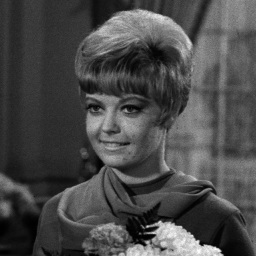

In [2]:
from PIL import Image
Image.open('wom.jpg')


In [3]:
img= cv2.imread('wom.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cdf= hist.cumsum()
cdf_norm= cdf * hist.max() / cdf.max()


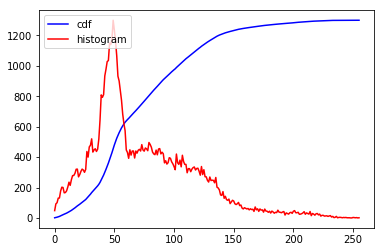

In [4]:
plt.plot(cdf_norm, color = 'b')
plt.plot(hist, color='r')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [5]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [6]:
img2 = cdf[img]

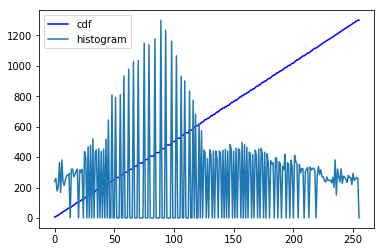

In [7]:

hist = cv2.calcHist([img2],[0],None,[256],[0,256])
cdf2= hist.cumsum()
cdf_norm2= cdf2 * hist.max() / cdf2.max()
plt.plot(cdf_norm2, color = 'b')
plt.plot(hist)
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


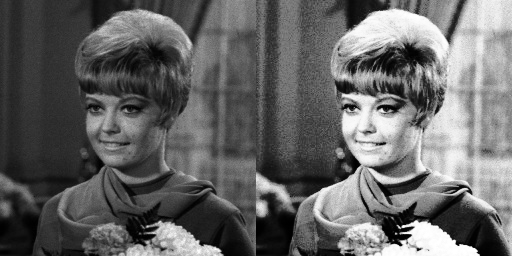

In [8]:
img = cv2.imread('wom.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) 
cv2.imwrite('res.png',res)
Image.open('res.png')

# Detect Edges of an object in an image

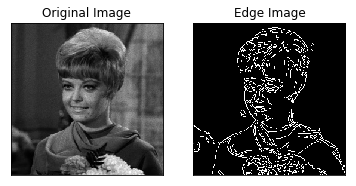

In [9]:
img_ = cv2.imread('wom.jpg',0)
edges = cv2.Canny(img_,100,200)

plt.subplot(121)
plt.imshow(img_,cmap = 'gray')
plt.title('Original Image') 
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()

# Match two images and check they are similar

In [10]:
Orig = cv2.imread('sun1.jpg',0)
Dupi = cv2.imread('sun2.jpg')
#Method-1
if Orig.shape==Dupi.shape:
    print('Images are Similar')


([], <a list of 0 Text yticklabel objects>)

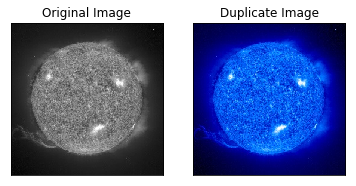

In [11]:
plt.subplot(121)
plt.imshow(Orig,cmap = 'gray')
plt.title('Original Image') 
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(Dupi,cmap= 'gray')
plt.title('Duplicate Image') 
plt.xticks([])
plt.yticks([])


# Image Resolution(Image Reshape)

In [12]:
print('Original Shape:',Orig.shape)

Original Shape: (256, 256)


In [13]:
scale_percent = 80 # percent of original size
width = int(Orig.shape[1] * scale_percent / 100)
height = int(Orig.shape[0] * scale_percent / 100)
dim = (width, height)

In [14]:
print(dim)

(204, 204)


Resized Dimensions :  (204, 204)


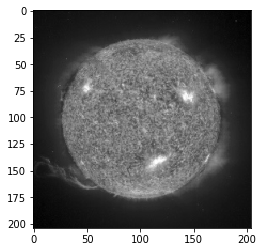

In [15]:
resized = cv2.resize(Orig, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized,cmap= 'gray')
 

# Geometrically match two Image

In [16]:
img_1 = cv2.imread('img.png',0)
rows,cols = img_1.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img_1,M,(cols,rows))

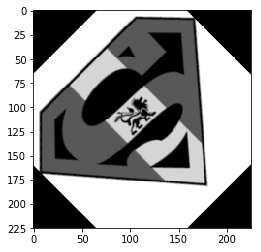

In [17]:
plt.imshow(dst,cmap= 'gray')
 

In [18]:
if img_1.shape==dst.shape:
    print('Images are Similar')


Images are Similar


([], <a list of 0 Text yticklabel objects>)

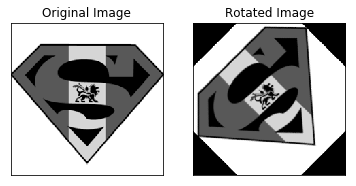

In [19]:
plt.subplot(121)
plt.imshow(img_1,cmap = 'gray')
plt.title('Original Image') 
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(dst,cmap= 'gray')
plt.title('Rotated Image') 
plt.xticks([])
plt.yticks([])

# Explain the following concept-
6).Spatial Resolution

In [20]:
rose=cv2.imread('rose.jpeg')

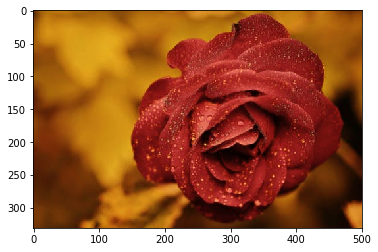

In [21]:
plt.imshow(rose)

In [22]:
print('Orignal Shape=',rose.shape)

Orignal Shape= (331, 500, 3)


In [23]:
scale_percent = 60 # percent of original size
width = int(rose.shape[1] * scale_percent / 100)
height = int(rose.shape[0] * scale_percent / 100)
dim = (width, height)

In [24]:
print(dim)

(300, 198)


Resized Dimensions :  (198, 300, 3)


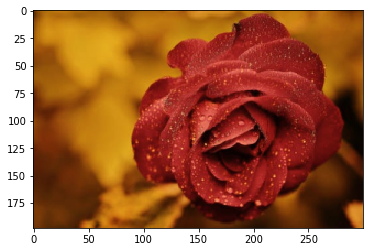

In [25]:
resized = cv2.resize(rose, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized,cmap= 'gray')
 

In [26]:
vegi= cv2.imread('vegi.png',0)
hist = cv2.calcHist([vegi],[0],None,[256],[0,256])
cdf= hist.cumsum()
cdf_norm= cdf * hist.max() / cdf.max()

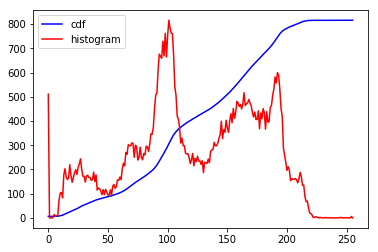

In [27]:
plt.plot(cdf_norm, color = 'b')
plt.plot(hist, color='r')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [28]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [29]:
img3 = cdf[vegi]

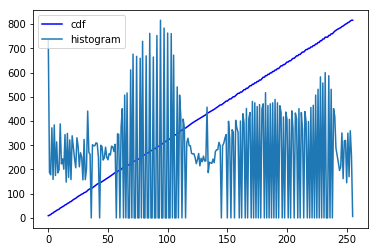

In [30]:
hist = cv2.calcHist([img3],[0],None,[256],[0,256])
cdf2= hist.cumsum()
cdf_norm2= cdf2 * hist.max() / cdf2.max()
plt.plot(cdf_norm2, color = 'b')
plt.plot(hist)
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


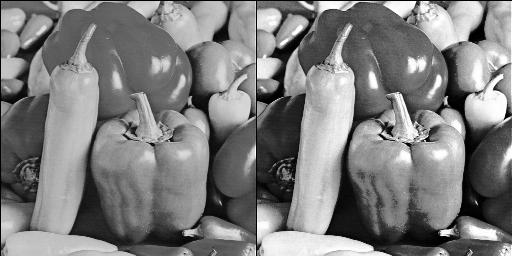

In [31]:
vegi = cv2.imread('vegi.png',0)
equ1 = cv2.equalizeHist(vegi)
res_ = np.hstack((vegi,equ1)) 
cv2.imwrite('res_.png',res_)
Image.open('res_.png')

In [32]:
from skimage.exposure import rescale_intensity
import argparse

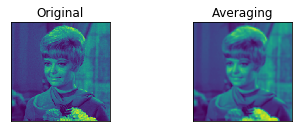

In [33]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img_,-4,kernel) 
plt.subplot(221)
plt.imshow(img_)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(dst)
plt.title('Averaging')
plt.xticks([])
plt.yticks([])
plt.show()

Found 4 faces!


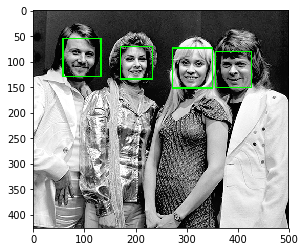

In [35]:

cascPath = "haarcascade_frontalface_alt.xml"
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread('abba.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(image)
